In [ ]:
# default_exp utils.common_utils

# Common utils
> A collection of utilities often used.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import sys
import os
import ssl
import os.path as osp
from six.moves import urllib
import errno
import tarfile
import zipfile
import bz2
import gzip
import numpy as np
import pandas as pd
from tabulate import tabulate
import numpy as np
import time
import scipy.sparse as sp

## Download

In [ ]:
#exporti
def makedirs(path):
    try:
        os.makedirs(osp.expanduser(osp.normpath(path)))
    except OSError as e:
        if e.errno != errno.EEXIST and osp.isdir(path):
            raise e

In [ ]:
#export
def wget_download(url, savepath):
    import wget
    wget.download(url, str(savepath))

In [ ]:
#export
def download_url(url: str, folder: str, log: bool = True):
    r"""Downloads the content of an URL to a specific folder.
    Args:
        url (string): The url.
        folder (string): The folder.
        log (bool, optional): If :obj:`False`, will not print anything to the
            console. (default: :obj:`True`)
    """

    filename = url.rpartition('/')[2]
    filename = filename if filename[0] == '?' else filename.split('?')[0]
    path = osp.join(folder, filename)

    if osp.exists(path):  # pragma: no cover
        if log:
            print(f'Using existing file {filename}', file=sys.stderr)
        return path

    if log:
        print(f'Downloading {url}', file=sys.stderr)

    makedirs(folder)

    context = ssl._create_unverified_context()
    data = urllib.request.urlopen(url, context=context)

    with open(path, 'wb') as f:
        f.write(data.read())

    return path

In [ ]:
download_url('https://files.grouplens.org/datasets/movielens/ml-1m.zip',
             './data/bronze')

'./data/bronze/ml-1m.zip'

In [ ]:
!tree ./data

./data
└── bronze
    └── ml-1m.zip

1 directory, 1 file


In [ ]:
!tree --du -h -C ./data

./data
├── [ 24M]  bronze
│   └── [ 24M]  ml-1m
│       ├── [167K]  movies.dat
│       ├── [ 23M]  ratings.dat
│       ├── [5.4K]  README
│       └── [131K]  users.dat
└── [3.0M]  silver
    └── [3.0M]  ml-1m_min_rating0-min_uc5-min_sc5-splitleave_one_out
        └── [3.0M]  dataset.pkl

  27M used in 4 directories, 5 files


## Extract

In [ ]:
#exporti
def maybe_log(path, log=True):
    if log:
        print(f'Extracting {path}', file=sys.stderr)

In [ ]:
#export
def extract_tar(path: str, folder: str, mode: str = 'r:gz', log: bool = True):
    r"""Extracts a tar archive to a specific folder.
    Args:
        path (string): The path to the tar archive.
        folder (string): The folder.
        mode (string, optional): The compression mode. (default: :obj:`"r:gz"`)
        log (bool, optional): If :obj:`False`, will not print anything to the
            console. (default: :obj:`True`)
    """
    maybe_log(path, log)
    with tarfile.open(path, mode) as f:
        f.extractall(folder)

In [ ]:
#export
def extract_zip(path: str, folder: str, log: bool = True):
    r"""Extracts a zip archive to a specific folder.
    Args:
        path (string): The path to the tar archive.
        folder (string): The folder.
        log (bool, optional): If :obj:`False`, will not print anything to the
            console. (default: :obj:`True`)
    """
    maybe_log(path, log)
    with zipfile.ZipFile(path, 'r') as f:
        f.extractall(folder)

In [ ]:
#export
def extract_bz2(path: str, folder: str, log: bool = True):
    r"""Extracts a bz2 archive to a specific folder.
    Args:
        path (string): The path to the tar archive.
        folder (string): The folder.
        log (bool, optional): If :obj:`False`, will not print anything to the
            console. (default: :obj:`True`)
    """
    maybe_log(path, log)
    path = osp.abspath(path)
    with bz2.open(path, 'r') as r:
        with open(osp.join(folder, '.'.join(path.split('.')[:-1])), 'wb') as w:
            w.write(r.read())

In [ ]:
#export
def extract_gz(path: str, folder: str, log: bool = True):
    r"""Extracts a gz archive to a specific folder.
    Args:
        path (string): The path to the tar archive.
        folder (string): The folder.
        log (bool, optional): If :obj:`False`, will not print anything to the
            console. (default: :obj:`True`)
    """
    maybe_log(path, log)
    path = osp.abspath(path)
    with gzip.open(path, 'r') as r:
        with open(osp.join(folder, '.'.join(path.split('.')[:-1])), 'wb') as w:
            w.write(r.read())

## Printing

In [ ]:
#export
def print_result_as_table(results, tag=None):
    """Print results as a table."""
    eval_infos = set()
    for result in results:
        eval_infos.update(result.keys())
    eval_infos = list(eval_infos)
    print("-" * 80)
    if tag is not None:
        print(tag)
    for result in results:
        for eval_info in eval_infos:
            if eval_info not in result:
                result[eval_info] = "--"
    df = pd.DataFrame(results)
    df = df.set_index("model")
    df = df.T
    print(tabulate(df, headers=df.columns, tablefmt="psql"))
    print("-" * 80)

In [ ]:
results = [{'model':'MF', 'MRR':.35},
           {'model':'NCF', 'MRR':.42, 'nDCG':.25}]

print_result_as_table(results)

--------------------------------------------------------------------------------
+------+------+-------+
|      | MF   |   NCF |
|------+------+-------|
| MRR  | 0.35 |  0.42 |
| nDCG | --   |  0.25 |
+------+------+-------+
--------------------------------------------------------------------------------


In [ ]:
#export
def log(msg):
    """Print string s and current time."""
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    return f"{current_time} | {msg}"

In [ ]:
log('Log function created')

'11:57:53 | Log function created'

In [ ]:
#export
def print_header(s):
    """Print a nice header for string s."""
    print()
    print(f"##{'#'*len(s)}##")
    print(f"# {s} #")
    print(f"##{'#'*len(s)}##")
    print()

In [ ]:
print_header('Log function created')


########################
# Log function created #
########################



## Listing

In [ ]:
#export
def list_files(startpath):
    """
    Util function to print the nested structure of a directory
    """
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        indent = " " * 4 * (level)
        print("{}{}/".format(indent, os.path.basename(root)))
        subindent = " " * 4 * (level + 1)
        for f in files:
            print("{}{}".format(subindent, f))

In [ ]:
list_files('./sample_data')

sample_data/
    README.md
    anscombe.json
    california_housing_train.csv
    california_housing_test.csv
    mnist_test.csv
    mnist_train_small.csv


## Seeding

In [ ]:
#export
import sys
import os
import numpy as np
import torch
import random

In [ ]:
#export
def seed_everything(seed=40):
    """sets the random seed to establish deterministic behaviors

    Args:
        seed (int): the random seed integer
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    # some cudnn methods can be random even after fixing the seed
    # unless you tell it to be deterministic
    torch.backends.cudnn.deterministic = True

## Mapping, Masking, and Padding

In [ ]:
#export
import random
import numpy as np
import pandas as pd

import torch
from torch.nn import functional as F

In [ ]:
#export
def map_column(df: pd.DataFrame, col_name: str):
    """Maps column values to integers.
    """
    values = sorted(list(df[col_name].unique()))
    mapping = {k: i + 2 for i, k in enumerate(values)}
    inverse_mapping = {v: k for k, v in mapping.items()}
    df[col_name + "_mapped"] = df[col_name].map(mapping)
    return df, mapping, inverse_mapping

def get_context(df: pd.DataFrame, split: str, context_size: int = 120, val_context_size: int = 5, seed: int = 42):
    """Create a training / validation samples.
    """
    random.seed(seed)
    if split == "train":
        end_index = random.randint(10, df.shape[0] - val_context_size)
    elif split in ["val", "test"]:
        end_index = df.shape[0]
    else:
        raise ValueError
    start_index = max(0, end_index - context_size)
    context = df[start_index:end_index]
    return context

## Padding

def pad_arr(arr: np.ndarray, expected_size: int = 30):
    """Pad top of array when there is not enough history.
    """
    arr = np.pad(arr, [(expected_size - arr.shape[0], 0), (0, 0)], mode="edge")
    return arr

def pad_list(list_integers, history_size: int, pad_val: int = 0, mode="left"):
    """Pad list from left or right
    """
    if len(list_integers) < history_size:
        if mode == "left":
            list_integers = [pad_val] * (history_size - len(list_integers)) + list_integers
        else:
            list_integers = list_integers + [pad_val] * (history_size - len(list_integers))
    return list_integers

# Masking

def mask_list(l1, p=0.8, mask=1, seed=42):
    random.seed(seed)
    l1 = [a if random.random() < p else mask for a in l1]
    return l1

def mask_last_elements_list(l1, val_context_size: int = 5, seed=42):
    l1 = l1[:-val_context_size] + mask_list(l1[-val_context_size:], p=0.5, seed=seed)
    return l1

def masked_accuracy(y_pred: torch.Tensor, y_true: torch.Tensor, mask: torch.Tensor):
    _, predicted = torch.max(y_pred, 1)
    y_true = torch.masked_select(y_true, mask)
    predicted = torch.masked_select(predicted, mask)
    acc = (y_true == predicted).double().mean()
    return acc

def masked_ce(y_pred, y_true, mask):
    loss = F.cross_entropy(y_pred, y_true, reduction="none")
    loss = loss * mask
    return loss.sum() / (mask.sum() + 1e-8)

In [ ]:
import unittest
from numpy.testing import assert_array_equal

In [ ]:
class TestUtils(unittest.TestCase):
    def testColMapping(self):
        "test the column mapping function"
        df = pd.DataFrame(
            {'uid': [1,2,3,4],
             'sid': [1,3,5,7]}
        )
        df, _, _ = map_column(df, col_name='sid')
        assert_array_equal(df.sid_mapped.values,
                           [2, 3, 4, 5])
        
    def testSplit(self):
        "test the train/test/val split"
        SEED = 42
        df = pd.DataFrame(
            {'uid': list(np.arange(50)),
                'sid': list(np.arange(50))}
        )
        context = get_context(df, split='train', context_size=5, seed=SEED)
        assert_array_equal(context.sid.values,
                           [12, 13, 14, 15, 16])
        
    def testArrayPadding(self):
        "test array padding function"
        pad_output_1 = pad_arr(np.array([[1,2,3],[7,8,9]]), expected_size=5)
        pad_output_2 = pad_arr(np.array([[1,2,3]]), expected_size=3)
        assert_array_equal(pad_output_1,
                           [[1, 2, 3],
                            [1, 2, 3],
                            [1, 2, 3],
                            [1, 2, 3],
                            [7, 8, 9]])
        assert_array_equal(pad_output_2,
                           [[1, 2, 3],
                            [1, 2, 3],
                            [1, 2, 3]])
        
    def testListPadding(self):
        "test list padding function"
        pad_output_1 = pad_list([1,2,3], history_size=5, pad_val=0, mode='left')
        pad_output_2 = pad_list([1,2,3], history_size=6, pad_val=1, mode='right')
        assert_array_equal(pad_output_1,
                           [0, 0, 1, 2, 3])
        assert_array_equal(pad_output_2,
                           [1, 2, 3, 1, 1, 1])

In [ ]:
class TestModelUtils(unittest.TestCase):
    def testMaskedAccuracy(self):
        "test the masked accuracy"
        output1 = masked_accuracy(torch.Tensor([[0,1,1,0]]),
                                torch.Tensor([[0,1,1,1]]),
                                torch.tensor([1,1,1,1], dtype=torch.bool))

        output2 = masked_accuracy(torch.Tensor([[0,1,1,0]]),
                                torch.Tensor([[0,1,1,1]]),
                                torch.tensor([1,0,0,1], dtype=torch.bool))

        self.assertEqual(output1, torch.tensor(0.75, dtype=torch.float64))
        self.assertEqual(output2, torch.tensor(0.5, dtype=torch.float64))

    def testMaskedCrossEntropy(self):
        input = [[1.1049, 1.5729, 1.4864],
        [-1.8321, -0.3137, -0.3257]]
        target = [0,2]

        output1 = masked_ce(torch.tensor(input),
                            torch.tensor(target),
                            torch.tensor([1,0], dtype=torch.bool))

        output2 = masked_ce(torch.tensor(input), 
                            torch.tensor(target),
                            torch.tensor([1,1], dtype=torch.bool))
        
        assert_array_equal(output1.numpy().round(4),
                           np.array(1.4015, dtype=np.float32))
        assert_array_equal(output2.numpy().round(4),
                           np.array(1.1026, dtype=np.float32))
        
    def testMaskList(self):
        seed = 42
        assert_array_equal(mask_list([1,2,3,4,5,6,7,8], seed=seed),
                           [1,2,3,4,5,6,1,8])
        seed = 40
        assert_array_equal(mask_list([1,2,3,4,5,6,7,8], seed=seed),
                           [1,1,3,4,1,6,7,8])

    def testMaskListLastElement(self):
        seed = 42
        output1 = mask_last_elements_list([1,2,3,4,5,6,7,8], val_context_size=5, seed=seed)
        output2 = mask_last_elements_list([1,2,3,4,5,6,7,8], val_context_size=3, seed=seed)
        assert_array_equal(output1, [1,2,3,1,5,6,7,1])
        assert_array_equal(output2, [1,2,3,4,5,1,7,8])

In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

testMaskList (__main__.TestModelUtils) ... ok
testMaskListLastElement (__main__.TestModelUtils) ... ok
testMaskedAccuracy (__main__.TestModelUtils)
test the masked accuracy ... ok
testMaskedCrossEntropy (__main__.TestModelUtils) ... ok
testArrayPadding (__main__.TestUtils)
test array padding function ... ok
testColMapping (__main__.TestUtils)
test the column mapping function ... ok
testListPadding (__main__.TestUtils)
test list padding function ... ok
testSplit (__main__.TestUtils)
test the train/test/val split ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.032s

OK


## Pandas DF

In [ ]:
#export
def explode(df, col_expl):
    """Separate string in column col_expl and explode elements into multiple rows."""

    s = df[col_expl].str.split('|', expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2[col_expl] = s.values

    return df2


def explode_mult(df_in, col_list):
    """Explode each column in col_list into multiple rows."""

    df = df_in.copy()

    for col in col_list:
        df.loc[:, col] = df.loc[:, col].str.split("|")

    df_out = pd.DataFrame(
        {col: np.repeat(df[col].to_numpy(),
                        df[col_list[0]].str.len())
         for col in df.columns.drop(col_list)}
    )

    for col in col_list:
        df_out.loc[:, col] = np.concatenate(df.loc[:, col].to_numpy())

    return df_out


def group_concat(df, gr_cols, col_concat):
    """Concatenate multiple rows into one."""

    df_out = (
        df
        .groupby(gr_cols)[col_concat]
        .apply(lambda x: ' '.join(x))
        .to_frame()
        .reset_index()
    )

    return df_out

## Sparsifying

In [ ]:
#export
def get_coo_matrix(df,
                   user_col='user_id',
                   item_col='item_id',
                   weight_col=None,
                   users_mapping={},
                   items_mapping={}):    
    if weight_col is None:
        weights = np.ones(len(df), dtype=np.float32)
    else:
        weights = df[weight_col].astype(np.float32)

    interaction_matrix = sp.coo_matrix((
        weights,
        (
            df[user_col].map(users_mapping.get),
            df[item_col].map(items_mapping.get)
        )
    ))
    return interaction_matrix

## Download

In [ ]:
def get_image(url, show=False):
    """get the image from the given url"""
    import requests
    from PIL import Image
    from io import BytesIO
    import matplotlib.pyplot as plt
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    if show:
        plt.imshow(img)
    return img

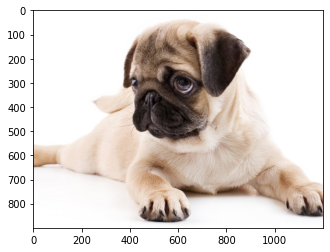

In [ ]:
_ = get_image('http://t.ly/HuXV', show=True)

## Other

### _count_a_in_b_unique

In [ ]:
#export
def count_a_in_b_unique(a, b):
    """
    :param a: list of lists
    :param b: list of lists
    :return: number of elements of a in b
    """
    count = 0
    for el in a:
        if el in b:
            count += 1
    return count

### _remove_duplicates

In [ ]:
#export
def remove_duplicates(l):
    return [list(x) for x in set(tuple(x) for x in l)]

In [ ]:
#hide
%reload_ext watermark
%watermark -a "Sparsh A." -m -iv -u -t -d

Author: Sparsh A.

Last updated: 2021-12-21 12:52:30

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.104+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

sys    : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
google : 2.0.3
numpy  : 1.19.5
pandas : 1.1.5
tarfile: 0.9.0
six    : 1.15.0
IPython: 5.5.0

